Note: Images are vectorized as columns, not rows. This is to use for loops to iterate images.

Note: Don't forget to edit paths according to your Drive folders.

In [1]:
import numpy as np
image1 = [1,1,1]
image2 = [2,2,2]
images = [image1 , image2]
images = np.array(images)
for item in images:
  print(item)
  
print(np.shape(images))  

[1 1 1]
[2 2 2]
(2, 3)


# Load Dataset Shortcut (If you use this, you dont need to use *Import Data* section)

Getting Ready

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import os
import glob

from google.colab import drive
drive.mount("/content/drive", force_remount=False)

Pickle load training data shortcut

In [0]:
import pickle
imtrain = None
path_pickle = '/content/drive/My Drive/bio/bioproj'

pickle_in = open(os.path.join(path_pickle,"imtrain.pickle"),"rb")
imtrain = pickle.load(pickle_in)

Pickle load test data shortcut

In [0]:
import pickle
imtest = None
path_pickle = '/content/drive/My Drive/bio/bioproj'

pickle_in = open(os.path.join(path_pickle,"imtest.pickle"),"rb")
imtest = pickle.load(pickle_in)

In [0]:
print(np.shape(imtrain))
print(np.shape(imtest))

# Import Data

## Getting Ready

### Import libraries, mount your Google Drive, declare your database path.

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import os
import glob

In [45]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [4]:
path = '/content/drive/My Drive/bio/bioproj/ORL-DATABASE'
!ls '/content/drive/My Drive/bio/bioproj/ORL-DATABASE'

README.TXT  s03  s06  s09  s12	s15  s18  s21  s24  s27  s30  s33  s36	s39
s01	    s04  s07  s10  s13	s16  s19  s22  s25  s28  s31  s34  s37	s40
s02	    s05  s08  s11  s14	s17  s20  s23  s26  s29  s32  s35  s38


### Change names of folders to make them sortable lexicographically

Change folder names

In [5]:
mylist = sorted(glob.glob(path + "/s[1-9]"))
print(mylist)

for item in mylist:
  os.rename(item, os.path.join(path, 's0' + os.path.basename(item)[1]))
  #print(path + 's0' + os.path.basename(item)[1])

!ls '/content/drive/My Drive/bio/bioproj/ORL-DATABASE'

[]
README.TXT  s03  s06  s09  s12	s15  s18  s21  s24  s27  s30  s33  s36	s39
s01	    s04  s07  s10  s13	s16  s19  s22  s25  s28  s31  s34  s37	s40
s02	    s05  s08  s11  s14	s17  s20  s23  s26  s29  s32  s35  s38


Change image names

In [0]:
mylist2 = sorted(glob.glob(path + "/s*"))
for item in mylist2:
  #print(item)
  mylist3 = sorted(glob.glob(item + "/[1-9].pgm"))

  for item2 in mylist3:
    os.rename(item2, os.path.join(item,'0' + os.path.basename(item2))) 
    #print(os.path.join(item,'0' + os.path.basename(item2)))
    

In [7]:
for item in mylist2:
  os.chdir(item)
  !ls
  break

01.pgm	02.pgm	03.pgm	04.pgm	05.pgm	06.pgm	07.pgm	08.pgm	09.pgm	10.pgm


## Training Data

### Load Training Data

In [0]:
import cv2

sample_num = len(mylist2)
imtrain = [] * (sample_num * 5)

for item in mylist2:
  
  impaths=sorted(glob.glob(item + "/0[1-5].pgm"))
  for item2 in impaths:
    imtrain.append(cv2.imread(item2,-1))
    
    


### Save Training Data as a  Pickle file

In [0]:
import pickle
path_pickle = '/content/drive/My Drive/bio/bioproj'

pickle_out = open(os.path.join(path_pickle,"imtrain.pickle"),"wb")
pickle.dump(imtrain, pickle_out)
pickle_out.close()




## Test Data

### Load Test Data

In [0]:
# remember, mylist2 == sorted(glob.glob("/content/drive/My Drive/bio/bioproj/ORL-DATABASE/" + "s*"))
sample_num = 40
imtest = [] * (5*sample_num)

for item in mylist2:
 
  for ctr in range(6,10):
    imp = os.path.join(item,"0{0}.pgm".format(ctr))
    imtest.append(cv2.imread(imp,-1))
    
  imp = os.path.join(item,"10.pgm")
  imtest.append(cv2.imread(imp,-1))


### Save Test Data as a  Pickle file

In [0]:
import pickle
path_pickle = '/content/drive/My Drive/bio/bioproj'

pickle_out = open(os.path.join(path_pickle,"imtest.pickle"),"wb")
pickle.dump(imtest, pickle_out)
pickle_out.close()



# Steps 1-8 described in the assignment, to extract features from an image.

## Draw: faces, mean face, difference faces

Just show a face

(200, 112, 92)


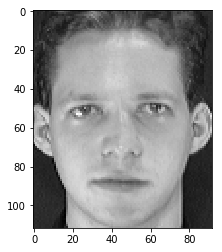

In [10]:
print(np.shape(imtrain))

plt.imshow(imtrain[0], cmap = "gray")

In [11]:
imtrain=np.reshape(imtrain,(200,112*92))
print(np.shape(imtrain))

imtest=np.reshape(imtest,(200,112*92))
print(np.shape(imtest))

(200, 10304)
(200, 10304)


Show mean face

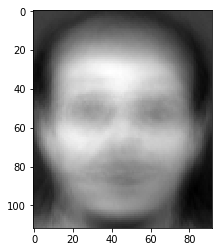

In [12]:
avg = np.mean(imtrain, axis = 0)

plt.imshow(np.reshape(avg,(112,92)),  cmap = "gray")

Show a difference face (normalized)

(200, 10304)


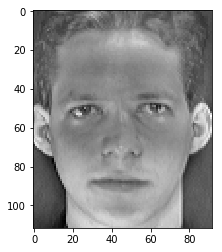

In [13]:
diff = imtrain - avg
print(np.shape(diff))
plt.imshow(np.reshape(diff[0],(112,92)),  cmap = "gray")

## L matrices

### Form the matrix

Big L matrix. I dont use this

In [14]:
#this l matrix is very big. lets use the smaller one.

"""lmatrix = np.dot(np.transpose(diff),diff)
print(np.shape(lmatrix))
fig=plt.figure(figsize=(8, 8))

fig.add_subplot(1, 3, 1)
plt.imshow(np.reshape(lmatrix[0],(112,92)),  cmap = "gray")

fig.add_subplot(1, 3, 2)
plt.imshow(np.reshape(lmatrix[5000],(112,92)),  cmap = "gray")

fig.add_subplot(1, 3, 3)
plt.imshow(np.reshape(lmatrix[10000],(112,92)),  cmap = "gray")"""

'lmatrix = np.dot(np.transpose(diff),diff)\nprint(np.shape(lmatrix))\nfig=plt.figure(figsize=(8, 8))\n\nfig.add_subplot(1, 3, 1)\nplt.imshow(np.reshape(lmatrix[0],(112,92)),  cmap = "gray")\n\nfig.add_subplot(1, 3, 2)\nplt.imshow(np.reshape(lmatrix[5000],(112,92)),  cmap = "gray")\n\nfig.add_subplot(1, 3, 3)\nplt.imshow(np.reshape(lmatrix[10000],(112,92)),  cmap = "gray")'

In [0]:
#this eigen operation takes too much time. lets use the smaller lmatrix.
#eigenvec=np.linalg.eig(lmatrix)

Small L matrix. I use this

(200, 200)


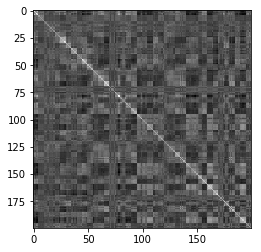

In [16]:
lmatrix2 = np.dot(diff,np.transpose(diff))
print(np.shape(lmatrix2))

plt.imshow(lmatrix2, cmap = "gray")

In [0]:
#eigenvectors are normalized by default in this function.

eigenval2, eigenvec2 = np.linalg.eig(lmatrix2)

In [18]:
"""print('big')

print(type(eigenvec))
print(len(eigenvec))
print(np.shape(eigenvec[0]))
print(np.shape(eigenvec[1]))
"""
print('\n\nsmall')

print(type(eigenvec2))
print(np.shape(eigenval2))
print(np.shape(eigenvec2))



small
<class 'numpy.ndarray'>
(200,)
(200, 200)


### Sort the eigenvalues

In [19]:
#we check if eigenval2 is sorted. It is almost sorted, but not perfectly. Lets sort it just in case.
eigenval2

array([ 6.11718569e+08,  4.07971439e+08,  2.32869909e+08,  1.84892954e+08,
        1.68500898e+08,  1.08187995e+08,  8.74367093e+07,  8.49476108e+07,
        6.84115273e+07,  5.84937885e+07,  5.45357236e+07,  4.40969395e+07,
        4.07234474e+07,  3.80931045e+07,  3.51864281e+07,  3.23921135e+07,
        3.13691641e+07,  2.88700830e+07,  2.64151550e+07,  2.43576000e+07,
        2.46972589e+07,  2.21073205e+07,  2.09139910e+07,  1.98091611e+07,
        1.95412467e+07,  1.82517471e+07,  1.74268330e+07,  1.70811376e+07,
        1.64792907e+07,  1.56355778e+07,  1.49336203e+07,  1.40526873e+07,
        1.39958590e+07,  1.33629870e+07,  1.30985622e+07,  1.29520739e+07,
        1.26385955e+07,  1.16357377e+07,  1.15652579e+07,  1.11715140e+07,
        1.10331774e+07,  1.08636578e+07, -5.38618114e-09,  9.98752670e+06,
        9.78798925e+06,  9.71436315e+06,  9.59072545e+06,  9.20337410e+06,
        9.06474597e+06,  8.73093652e+06,  8.59368145e+06,  8.24238068e+06,
        8.07703978e+06,  

In [20]:
#we obtain the indexes which we will use to sort eigenvec2 array later.
indexes=np.abs(eigenval2).argsort()[::-1]
print(indexes)

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  20  19  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  68  67  66  69  70  71  72
  73  74  75  76  78  77  79  80  81  82  83  84  85  86  89  90  91  92
  95  94  93 101 102 103 104 105 106 107 113 114 115 116 117 119 120 121
 118 123 124 129 130 131 132 133 134 135 136 137 138 149 148 150 151 154
 158 169 168 194 176 159 160 161 164 178 166 167 165 170 195 190 179 181
 180 189 199 185 192 193 198 191 183 184 187 197 186 196 188 182 174 172
 171 173 175 177 163 162 155 156 157 153 152 147 146 145 144 143 142 141
 140 139 128 127 126 125 122 112 111 110 109 108 100  99  98  97  96  88
  87  42]


In [21]:
#lets test if we've obtained the indexes right. They should be from large to small.
eigenval2[indexes]

array([ 6.11718569e+08,  4.07971439e+08,  2.32869909e+08,  1.84892954e+08,
        1.68500898e+08,  1.08187995e+08,  8.74367093e+07,  8.49476108e+07,
        6.84115273e+07,  5.84937885e+07,  5.45357236e+07,  4.40969395e+07,
        4.07234474e+07,  3.80931045e+07,  3.51864281e+07,  3.23921135e+07,
        3.13691641e+07,  2.88700830e+07,  2.64151550e+07,  2.46972589e+07,
        2.43576000e+07,  2.21073205e+07,  2.09139910e+07,  1.98091611e+07,
        1.95412467e+07,  1.82517471e+07,  1.74268330e+07,  1.70811376e+07,
        1.64792907e+07,  1.56355778e+07,  1.49336203e+07,  1.40526873e+07,
        1.39958590e+07,  1.33629870e+07,  1.30985622e+07,  1.29520739e+07,
        1.26385955e+07,  1.16357377e+07,  1.15652579e+07,  1.11715140e+07,
        1.10331774e+07,  1.08636578e+07,  9.98752670e+06,  9.78798925e+06,
        9.71436315e+06,  9.59072545e+06,  9.20337410e+06,  9.06474597e+06,
        8.73093652e+06,  8.59368145e+06,  8.24238068e+06,  8.07703978e+06,
        7.93894970e+06,  

In [0]:
#we sort the eigenvectors according to their eigenvales
eigenvec2 = eigenvec2[indexes]

## Form eigenfaces

In [23]:
#remember, diff is the A matrix.

print(np.shape(diff))
print(np.shape(eigenvec2))
#efaces will also be sorted according to the eigenvalues, since eigenvec2 is sorted.
#efaces is the U matrix.
efaces=np.dot(eigenvec2,diff)
print(np.shape(efaces))

(200, 10304)
(200, 200)
(200, 10304)


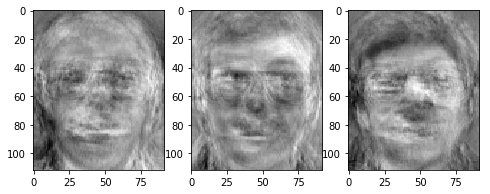

In [24]:
fig=plt.figure(figsize=(8, 8))

fig.add_subplot(1, 3, 1)
plt.imshow(np.reshape(efaces[0],(112,92)),  cmap = "gray")

fig.add_subplot(1, 3, 2)
plt.imshow(np.reshape(efaces[100],(112,92)),  cmap = "gray")

fig.add_subplot(1, 3, 3)
plt.imshow(np.reshape(efaces[199],(112,92)),  cmap = "gray")

Extract Features

In [25]:
print(np.shape(diff[0]))
#i did not get the transpose since the shapes already fit to the matrix multiplication
features=np.dot(efaces[0:2],diff[0])
print(np.shape(features))
print(features)

(10304,)
(2,)
[4148458.72678996 2784742.67438049]


# Assignment Requirements are here

### Plotting the first 20 eigenfaces:

In [26]:
img_h = 112
img_w = 92
img_num = len(imtest)
print(img_num,img_h,img_w)

200 112 92


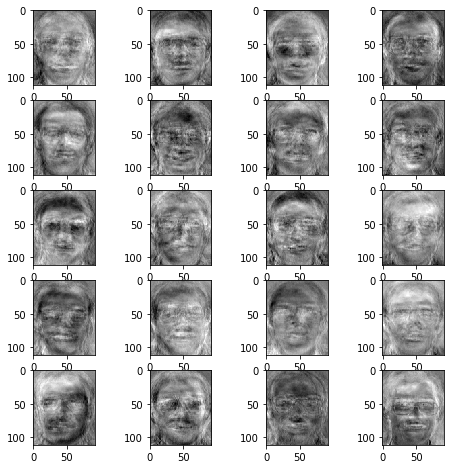

In [27]:
fig=plt.figure(figsize=(8, 8))

for ctr in range(20):
  fig.add_subplot(5, 4, ctr+1)
  plt.imshow(np.reshape(efaces[ctr],(img_h,img_w)),  cmap = "gray")


### Reconstructing a sample image with a certain number of features. ([2,5,10,20,40,60,100,150,200])

Some images that have satisfying results: 199, 184


Image No: 137


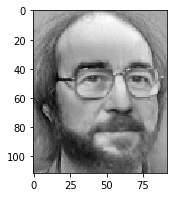

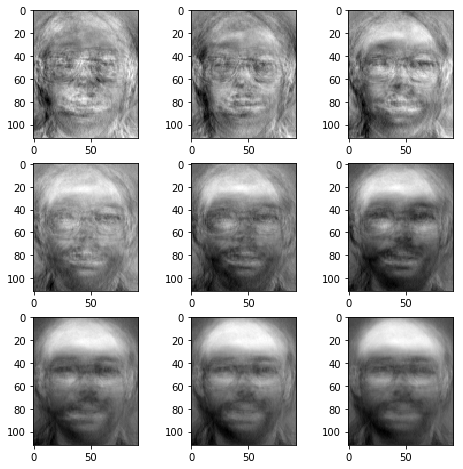

In [28]:
from random import randint

num_feat = [2,5,10,20,40,60,100,150,200]


randomnum = randint(0,img_num)
print("Image No:",randomnum)
sample = imtest[randomnum]


difference = sample.flatten() - avg



fig=plt.figure(figsize=(3, 3))
plt.imshow(np.reshape(difference,(img_h,img_w)),cmap = "gray")



fig=plt.figure(figsize=(8, 8))
for ctr,nf in enumerate(num_feat):
  
  fig.add_subplot(len(num_feat)/3, 3, ctr+1)
  

  features = np.dot(efaces[0:nf],difference)
  reconstructed=np.dot(np.transpose(efaces[0:nf]),features)
  
  
  imr = np.reshape(reconstructed,(img_h,img_w))
  plt.imshow(imr, cmap = "gray")
  
  

Here, we try to use the reconstruction method to restore a monkey image.

Image No: 105


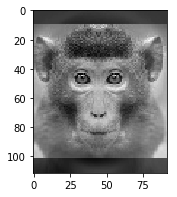

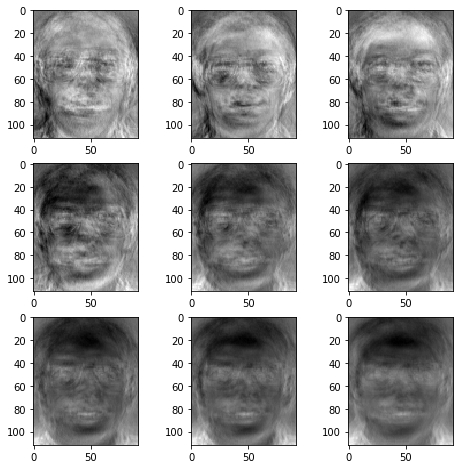

In [57]:
from PIL import Image
path = '/content/drive/My Drive/bio/bioproj'
monkey=Image.open(os.path.join(path,'monkey.png')).convert("L")

monkey = np.array(monkey)
monkey = np.transpose(monkey)
monkey = Image.fromarray(monkey)
monkey=monkey.rotate(270)
monkey = np.array(monkey)

from random import randint

num_feat = [2,5,10,20,40,60,100,150,200]


randomnum = randint(0,img_num)
print("Image No:",randomnum)
sample = monkey


difference = sample.flatten() - avg



fig=plt.figure(figsize=(3, 3))
plt.imshow(np.reshape(difference,(img_h,img_w)),cmap = "gray")



fig=plt.figure(figsize=(8, 8))
for ctr,nf in enumerate(num_feat):
  
  fig.add_subplot(len(num_feat)/3, 3, ctr+1)
  

  features = np.dot(efaces[0:nf],difference)
  reconstructed=np.dot(np.transpose(efaces[0:nf]),features)
  
  
  imr = np.reshape(reconstructed,(img_h,img_w))
  plt.imshow(imr, cmap = "gray")
  
  

### Plotting Identification Rate vs. Number of Features

**First we need to enroll the subjects by extracting features from the training set.**


np.shape(diffs) == (200,10304)

np.shape(efaces) == (200,10304)

enrollments = np.dot(diffs, np.transpose(efaces))

np.shape(enrollments) == (200,200)

In [29]:
num_feat = [2,5,10,20,40,60,100,150,200]

diffs = imtrain - avg

enrollments = [[]*200]*200

enrollments = np.dot(diffs,np.transpose(efaces))

print(np.shape(enrollments))
print(enrollments)

(200, 200)
[[  4148458.72678996   2784742.67438049   1867121.03725176 ...
   -8259339.24595203  -7070846.76803936   3208383.15635285]
 [ -3342147.70584012  -1534057.18804047    201090.66533609 ...
  -11027019.51034818 -10731545.09092085  -2349045.66906718]
 [  4842346.07682529   1613083.18791414   2040892.05200172 ...
  -11401068.31649424  -5824038.67909461   1401075.49475212]
 ...
 [  2017381.1072274   -2325564.49780887   -211227.52300108 ...
   -4245160.72824994  -4796873.05555834   3158420.09459234]
 [ -4995995.54763563  -2225620.25293506  -5436212.59529388 ...
    -137243.91393831   1228939.58172543  -5821883.43388979]
 [  -746925.20929275   -525067.22848644  -3737624.51539554 ...
   -3342176.27721579  -4396126.75103029   1333385.2080119 ]]


Now lets use certain amount of features to classify faces.

Enrollments have 200 images in it. To find person identity from the index of an enrollment element, we should do this:

int(index/5)

This operation tells us in which 5-sized block our element belongs in. 

Due to every 5-sized block being different images of the same person, this gives us the identity of that person.

In [30]:
print(type(imtrain))
print(type(imtest))

print(np.shape(imtrain))
print(np.shape(imtest))
print(np.shape(avg))
print(np.shape(efaces))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(200, 10304)
(200, 10304)
(10304,)
(200, 10304)


In [31]:
px = []
py = []
test_diffs = imtest - avg



for ctr,nf in enumerate(num_feat):
  
  features_test = None

  ctr_true = 0
  ctr_false = 0
  
  # we extract features of all test images. 
  
  # Now, every row in features_test is an 
  # attempt to log in to identification system.
  features_test = np.dot(test_diffs,np.transpose(efaces[0:nf]))
  #print(np.shape(features_test))
  
  
  #all attempts are ordered, in the sense that first five attempts are 
  #by the person that has the identification number "0". 
  #then, we can use attempt no to generate labels for our system.
  enroll_feat = enrollments[:,0:nf]
  print(np.shape(enroll_feat))
  for attempt_no, imf in enumerate(features_test):
    
    identity_label = int(attempt_no/5)
    index_min = np.argmin(np.linalg.norm(enroll_feat - imf.reshape((1,nf)), axis = 1))
    

    identity_prediction = int(index_min/5)
    
    if(identity_prediction == identity_label):
      ctr_true += 1
      
    else:
      ctr_false += 1
    
    #print(attempt_no,identity_prediction,identity_label)
      
  sum = ctr_true + ctr_false
  
  print(sum, ctr_true/sum,ctr_false/sum)
  
  px.append(nf)
  py.append(ctr_true/sum)
  
  
print(px)
print(py)

(200, 2)
200 0.155 0.845
(200, 5)
200 0.455 0.545
(200, 10)
200 0.72 0.28
(200, 20)
200 0.755 0.245
(200, 40)
200 0.76 0.24
(200, 60)
200 0.78 0.22
(200, 100)
200 0.78 0.22
(200, 150)
200 0.79 0.21
(200, 200)
200 0.78 0.22
[2, 5, 10, 20, 40, 60, 100, 150, 200]
[0.155, 0.455, 0.72, 0.755, 0.76, 0.78, 0.78, 0.79, 0.78]


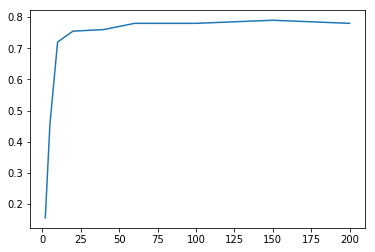

In [32]:
plt.plot(px,py)